# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Salsabila Tasya Amelia]
- **Email:** [salsabilatsyaa@gmail.com]
- **ID Dicoding:** [salssya505]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana pengaruh season terhadap total jumlah pengguna Bike Rent?

- Pertanyaan 2
Bagaimana perbandingan total penyewaan sepeda antara tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/salssya/submission/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/salssya/submission/refs/heads/main/data/hour.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_df.duplicated().sum()

0

Menilai data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hour_df.duplicated().sum()

0

### Cleaning Data

In [ ]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mengubah Tipe Data Time pada day_df

In [ ]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memperbaiki tipe data date time pada hour_df

In [ ]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengubah nama kolom pada day_df dan hour_df

In [ ]:
day_df.rename(columns={
    'instant':'id',
    'yr' : 'year',
    'dteday':'datetime',
    'mnth': 'month',
    'hum' : 'humidity',
    'weathersit': 'weater_condition',
    'cnt':'total_count',
}, inplace=True)

In [ ]:
day_df.tail()

,id,datetime,season,year,month,holiday,weekday,workingday,weater_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
hour_df.rename(columns={
    'instant':'id',
    'yr' : 'year',
    'dteday':'datetime',
    'mnth': 'month',
    'hum' : 'humidity',
    'weathersit': 'weater_condition',
    'cnt':'total_count',
}, inplace=True)

In [ ]:
hour_df.tail()

,id,datetime,season,year,month,hr,holiday,weekday,workingday,weater_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.sample(5)

,id,datetime,season,year,month,holiday,weekday,workingday,weater_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
268,269,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630
425,426,2012-03-01,1,1,3,0,4,1,1,0.485833,0.475371,0.615417,0.226987,325,4665,4990
45,46,2011-02-15,1,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
441,442,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836


In [ ]:
day_df.instant.is_unique

True

Windspeed Bike Rent

In [ ]:
day_df.groupby(by='windspeed').id.nunique().sort_values(ascending=False)

,id
windspeed,
0.106350,3
0.166667,3
0.136817,3
0.149883,3
0.110700,3
...,...
0.157963,1
0.157971,1
0.157975,1


Humidity Bike Rent

In [ ]:
day_df.groupby(by='humidity').id.nunique().sort_values(ascending=False)

,id
humidity,
0.613333,4
0.741250,3
0.630833,3
0.483333,3
0.722917,3
...,...
0.562083,1
0.561765,1
0.561667,1


Workingday Bike Rent

In [ ]:
day_df.groupby(by='workingday').id.nunique().sort_values(ascending=False)

,id
workingday,
1,500
0,231


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
season_rent_df = day_df.groupby("season").total_count.sum().sort_values(ascending=False).reset_index()

In [ ]:
season_rename = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rent_df['season'] = season_rent_df['season'].replace(season_rename)

In [ ]:
season_rent_df.head()

,season,total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


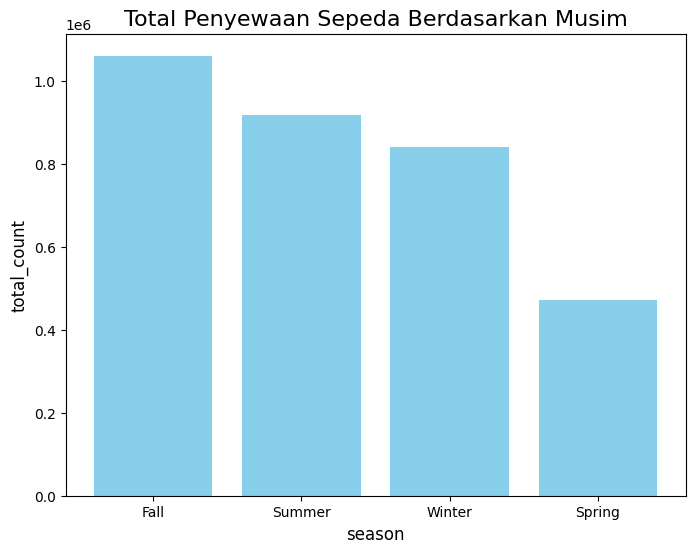

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(season_rent_df['season'], season_rent_df['total_count'], color='skyblue')

ax.set_title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
ax.set_xlabel('season', fontsize=12)
ax.set_ylabel('total_count', fontsize=12)

plt.show()

### Pertanyaan 2:

In [ ]:
year_rent_df = day_df.groupby("year")['total_count'].sum().reset_index()

In [ ]:
year_rename = {0: '2011', 1: '2012'}
year_rent_df['year'] = year_rent_df['year'].replace(year_rename)

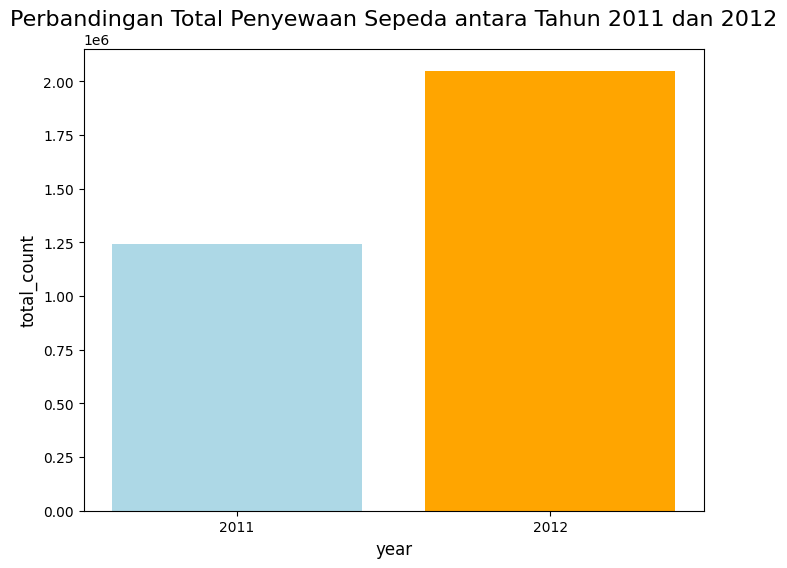

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(year_rent_df['year'], year_rent_df['total_count'], color=['lightblue', 'orange'])

ax.set_title('Perbandingan Total Penyewaan Sepeda antara Tahun 2011 dan 2012', fontsize=16)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('total_count', fontsize=12)

plt.show()



# Pertanyaan 3

bagaimana pengaruh cuaca dan temperature pada jumlah customer pada Bike Rental?

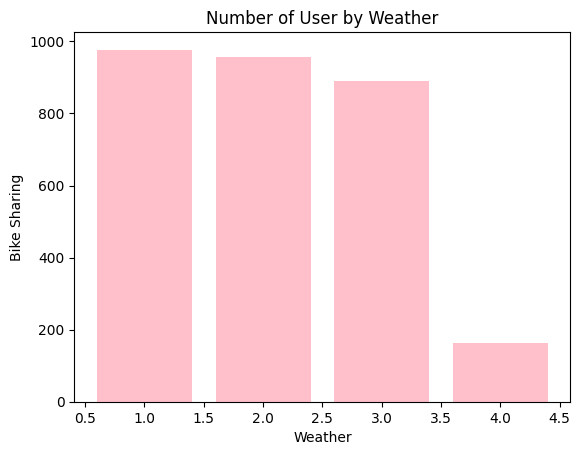

In [ ]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/salssya/submission/refs/heads/main/data/hour.csv')
hour_df = hour_df[['weathersit', 'cnt']].rename(columns={
    'weathersit': 'Weather',
    'cnt': 'User'
})
hour_df.sort_values(by='Weather', inplace=True)

plt.bar(x=hour_df["Weather"], height=hour_df["User"], color=['pink'])
plt.xlabel("Weather")
plt.ylabel("Bike Sharing")
plt.title("Number of User by Weather")
plt.show()

## Conclusion

- 1. Berdasarkan visualisasi dan data yang ditampilkan, musim Fall memiliki total jumlah penyewaan sepeda tertinggi dibandingkan dengan musim lainnya (Spring, Summer, Winter). Hal ini menunjukkan bahwa Fall mungkin memiliki kondisi cuaca yang lebih kondusif atau menarik bagi pengguna untuk menyewa sepeda, dibandingkan dengan musim lainnya. Faktor cuaca yang lebih sejuk atau peningkatan aktivitas luar ruang mungkin berkontribusi pada tingginya jumlah penyewaan sepeda selama musim ini. Sebaliknya, musim lain seperti Winter cenderung menunjukkan penurunan jumlah penyewaan karena cuaca yang mungkin lebih ekstrem atau kurang nyaman untuk bersepeda.
- 2. Dari visualisasi perbandingan antara tahun 2011 dan 2012, terlihat bahwa jumlah total penyewaan sepeda meningkat signifikan pada tahun 2012 dibandingkan tahun 2011. Ini bisa mengindikasikan adanya peningkatan popularitas atau permintaan penggunaan sepeda selama tahun tersebut. Faktor-faktor yang mungkin mempengaruhi peningkatan ini termasuk promosi penggunaan sepeda, perubahan kebijakan transportasi, atau peningkatan fasilitas pendukung bagi pengguna sepeda di tahun 2012.
- 3. Berdasarkan visualisasi yang ditampilkan, terlihat jelas bahwa jumlah pengguna sepeda sharing sangat dipengaruhi oleh kondisi cuaca. Cuaca cerah dan sedikit berawan menjadi favorit bagi pengguna sepeda. Semakin buruk cuaca, seperti hujan atau badai, semakin sedikit orang yang memilih menggunakan jasa sewa sepeda. Hal ini menunjukkan bahwa faktor cuaca merupakan pertimbangan utama bagi pengguna dalam memutuskan untuk menggunakan sepeda sharing. Dengan kata lain, penyedia layanan sepeda sharing perlu mempertimbangkan faktor cuaca dalam perencanaan bisnis mereka, seperti menyediakan fasilitas tambahan atau promosi khusus saat cuaca mendukung.

Exporting CSV

In [ ]:
day_df.to_csv("main_data_df.csv", index=False)